<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/Clase_2_Self_driving_cab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook veremos un ejemplo sencillo de cómo programar un taxi automático usando técnicas de Reinforcement Learning.

Para empezar, instalamos la libreria OpenAI Gym, que nos proporciona todos los elementos que necesitamos (acciones, estados, recompensas).

In [5]:
!pip install cmake 'gym[atari]' scipy

In [6]:
import gym
import numpy as np

#env = gym.make("Taxi-v3").env

# Especifica render_mode="ansi" al crear el entorno
env_raw = gym.make("Taxi-v3", render_mode="ansi")
env = env_raw.env # Si sigues queriendo el entorno base sin wrappers, aunque para renderizar puede ser mejor usar env_raw

In [7]:
# Set seed for experiment reproducibility
seed = 42
# env.seed(seed) # Línea original con error
env.reset(seed=seed) # Forma correcta en gym 0.26.x
np.random.seed(seed)

Con el método "render" podemos visualizar el entorno:

In [8]:
#env.render()

# env.render() ahora devuelve una cadena ANSI, así que necesitas imprimirla.
rendered_output = env_raw.render() # O env.render()
print(rendered_output)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




El rectangulo representa el taxi, y será amarillo cuando esté sin pasajero y verde con pasajero.

Las líneas continuas ("|") representan paredes, que el taxi no puede cruzar.

R, G, Y, B son las posibles posiciones de recogida y destino. La letra azul representa la posición actual de recogida del pasajero y la letra morada es el destino.

Visualizamos el conjunto de acciones y estados posibles:

In [9]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


Cómo ya hemos visto, tenemos un action space de tamaño 6 y un state space de tamaño 500.

Nuestro algoritmo de Reinforcement Learning no necesitará más información que esta.
Todo lo que necesitamos es una forma de identificar un estado de manera única, asignando un número único a cada estado posible.

Recordemos que los 500 estados corresponden a una codificación de la posición del taxi (5x5), la posición del pasajero (x5) y el destino (x4).

Con env.s podemos ver a qué número entre 0 y 499 corresponde el estado actual:

In [10]:
state = env.s
print("State:", state)

State: 386


In [11]:
env.reset()

state = env.s
print("State:", state)

rendered_output = env_raw.render() # O env.render()
print(rendered_output)

State: 214
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




De hecho, podemos considerar nuestra ilustración anterior, codificar su estado y dárselo al entorno para que se renderice en Gym.

Tenemos el taxi en la fila 3, columna 1, nuestro pasajero está en la posición 2 y nuestro destino es la posición 0.

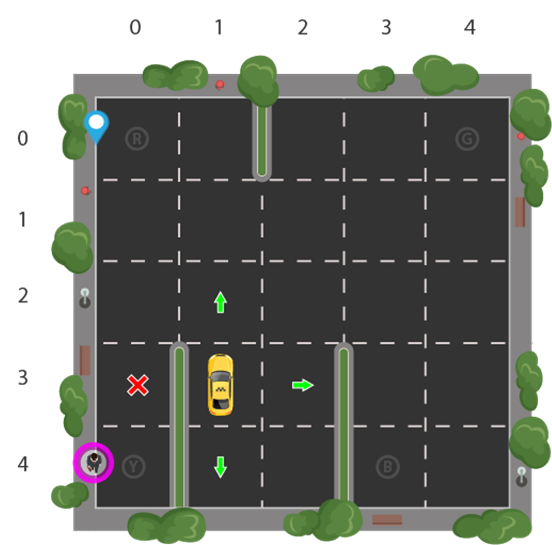

Usando el método de codificación de estado ("encode"), podemos hacer lo siguiente:

In [12]:
env.reset()

state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
rendered_output = env_raw.render() # O env.render()
print(rendered_output)

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




Estamos usando las coordenadas de nuestra imagen para generar un número correspondiente a un estado entre 0 y 499, que resulta ser 328.

Hemos visto que el action space es el conjunto de acciones posibles (6).

In [13]:
env.action_space

Discrete(6)

El metodo "sample" nos devuelve una accion entre las 6 disponibles:

0 = sur
1 = norte
2 = este
3 = oeste
4 = recoger
5 = dejar

In [14]:
action = env.action_space.sample()
#definido ya en openia gim
action

0

# ¡Nos movemos!

Supongamos que queremos movernos hacia el norte:

In [15]:
action = 1

Con "step" veremos qué pasa si realizamos la acción elegida:

In [17]:
observation, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated # Para mantener la lógica si el resto del código usa 'done'
state = observation           # Si el resto de tu código espera la variable 'state'


In [18]:
print(state, reward, done, info)

227 -1 False {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}


1.   El primer elemento es el nuevo estado.

2.   El segundo elemento es la recompensa. Todas las acciones de movimiento tienen una recompensa de -1 (es nuestra penalización pequeña por no llegar a destino después de cada movimiento) y las acciones de recoger/dejar tienen una recompensa de -10 en este estado en particular. Si estaramos en un estado donde el taxi tiene un pasajero y está encima del destino correcto, veríamos una recompensa de 20 en la acción "dejar".

3.   El tercer elemento, en este caso "False", nos indica si hemos dejado al pasajero en el destino correcto.

4.   El cuarto elemento es la probabilidad, que en este contexto será siempre 1.

Visualizamos el nuevo estado:

In [19]:
print("State:", state)

env.s = state
rendered_output = env_raw.render() # O env.render()
print(rendered_output)

State: 227
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)



In [20]:
observation, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated # Para mantener la lógica si el resto del código usa 'done'
state = observation           # Si el resto de tu código espera la variable 'state'

print("State:", state)

env.s = state
rendered_output = env_raw.render() # O env.render()
print(rendered_output)

State: 127
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)



In [21]:
observation, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated # Para mantener la lógica si el resto del código usa 'done'
state = observation           # Si el resto de tu código espera la variable 'state'
print(state, reward, done, info)

27 -1 False {'prob': 1.0, 'action_mask': array([1, 0, 0, 1, 0, 0], dtype=int8)}


In [22]:
env.s = state
rendered_output = env_raw.render() # O env.render()
print(rendered_output)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)



# Tabla de recompensas

Otro elemento que importamos con el entorno de OpenAI Gym es la tabla de recompensas.

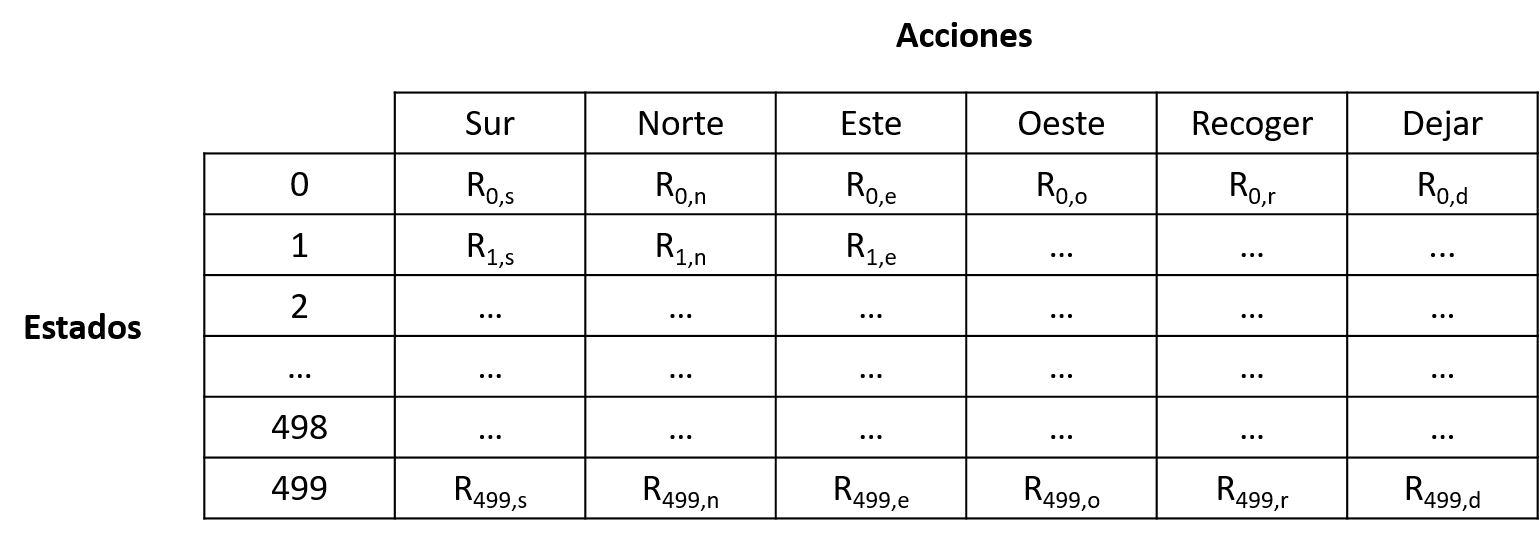

La matriz de recompensas iniciales se llama P, y tiene dimensión (500x6).

Podemos ver los valores de recompensa predeterminados asignados al estado de nuestra ilustración:

In [23]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

1.   El primer número corresponde a las acciones: 0 = sur
1 = norte
2 = este
3 = oeste
4 = recoger
5 = dejar

2.   El segundo número corresponde a la probabilidad, que en este caso es siempre 1.

3.   El tercer número es el siguiente estado, en el que estaríamos si tomaramos esa acción.

4.   El cuarto número es la recompensa. Todas las acciones de movimiento tienen una recompensa de -1 (es nuestra pensalización pequeña por no llegar a destino después de cada movimiento) y las acciones de recoger/dejar tienen una recompensa de -10 en este estado en particular. Si estaramos en un estado donde el taxi tiene un pasajero y está encima del destino correcto, veríamos una recompensa de 20 en la acción "dejar".

5.  El último elemento, es este caso siempre "False", nos indica si hemos dejado al pasajero en el destino correcto.

Vemos que en este caso no hay penalización especial por ir contra la pared (oeste). Simplemente cuenta cómo perder tiempo.

Teniendo la tabla de recompensa predeterminadas, podemos evaluar cómo se comporta nuestro taxi.

Creamos un agente que realizará 10 acciones (iteraremos sobre la variable timestep, que irá hasta 10); cuando acabe, miramos el total de recompensas/penalizaciones recibidas y si ha sido capaz de recoger al pasajero y dejarlo en su destino.



In [24]:
# Especifica render_mode="ansi" al crear el entorno si no lo has hecho antes
# env_raw = gym.make("Taxi-v3", render_mode="ansi")
# env = env_raw.env # Asumimos que 'env' ya está definido y reseteado como discutimos antes.

# Asegúrate de que env ha sido reseteado para que .s sea válido si lo vas a usar
# y para que render funcione.
# Por ejemplo: initial_obs, info = env.reset(seed=seed)
# env.s = 328 # Establecer 'env.s' directamente puede ser delicado con las nuevas versiones.
             # Es mejor resetear a un estado específico usando env.encode() y env.reset()
             # o simplemente dejar que env.reset() elija un estado inicial.
             # Si vas a usar env.s = 328, asegúrate de que el entorno esté en un
             # estado coherente para ello.

# Si el objetivo es partir de un estado específico como 328:
# Primero, asegúrate de que el entorno puede ser reseteado.
# Esto es importante si has estado ejecutando otros bloques de código.
obs, info = env.reset() # Reset general
state_to_set = 328
env.s = state_to_set # Asignar el estado deseado
current_observation = state_to_set # Asumimos que la observación es el estado numérico para Taxi-v3

timesteps_count, penalties, reward_val = 0, 0, 0 # Renombré las variables para evitar conflicto con el 'reward' del step

print("Initial state for the loop:")
print(env.render()) # Muestra el estado inicial ANTES del bucle
print(f"env.s: {env.s}")

# El bucle 'for' ya maneja 'timestep' como contador de 0 a 9.
# No necesitas una variable 'timestep' separada inicializada a 0 y luego incrementarla.
for current_loop_step in range(10): # 'current_loop_step' irá de 0 a 9

    action = env.action_space.sample()
    observation, reward_val, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # 'state' o 'current_observation' se actualiza con 'observation'
    current_observation = observation # Actualiza el estado actual para el siguiente bucle o para la Q-table
                                      # Si tu lógica depende de una variable llamada 'state', usa 'state = observation'

    if reward_val == -10:
        penalties += 1

    # No necesitas 'timestep += 1' aquí si usas 'current_loop_step' del for.
    # 'timesteps_count' podría ser usado si quieres contar explícitamente los pasos.
    # Por ejemplo, podrías hacer timesteps_count += 1 aquí si current_loop_step no es lo que quieres reportar.
    # Pero si solo quieres saber cuántas iteraciones hizo el bucle, current_loop_step + 1 al final será 10.

    print(f"\nAfter step {current_loop_step + 1}:")
    print(f"Action taken: {action}")
    print(f"New Observation: {observation}, Reward: {reward_val}, Done: {done}")
    print(env.render()) # Muestra el estado después de cada acción

# Al final del bucle 'for', current_loop_step habrá sido 9, por lo que se habrán ejecutado 10 pasos.
# Si quieres el total de pasos, es simplemente la cantidad de iteraciones del bucle.
total_steps_taken_in_loop = 10 # o len(range(10))

print(f"\nTimesteps taken: {total_steps_taken_in_loop}") # Reporta el número de iteraciones
print(f"Penalties incurred: {penalties}")
print("Final state after 10 steps:")
# env.render() ya se hizo dentro del bucle. Si quieres mostrar el estado final una vez más:
print(env.render())

Initial state for the loop:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


env.s: 328

After step 1:
Action taken: 4
New Observation: 389, Reward: -10, Done: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


After step 2:
Action taken: 4
New Observation: 389, Reward: -10, Done: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


After step 3:
Action taken: 4
New Observation: 389, Reward: -10, Done: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


After step 4:
Action taken: 0
New Observation: 489, Reward: -1, Done: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


After step 5:
Action taken: 1
New Observation: 389, Reward: -1, Done: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


After st

Cómo era de esperar, el taxi no ha ni siquiera llegado a recoger al pasajero, y ya ha acumulado un número de penalizaciones.

Y si quisieramos saber cuanto tiempo tardaría nuestro taxi en cumplir su objetivo?

Aquí es dónde aprovecharemos la variable "done", que es la que nos dice si hemos dejado al pasajero en el lugar correcto: en este caso, cogerá valor True.

Recordemos que esta información nos viene ya con el entorno, así que podemos crear un loop infinito que itere hasta que done = True.

In [25]:
# Asumimos que 'env' ya está definido, con render_mode="ansi", y reseteado.
# Por ejemplo:
# import gym
# env_raw = gym.make("Taxi-v3", render_mode="ansi")
# env = env_raw.env # o simplemente usa env_raw
# obs_info_tuple = env.reset(seed=42) # Gym 0.26+ reset puede devolver una tupla (obs, info)
# current_observation = obs_info_tuple[0] if isinstance(obs_info_tuple, tuple) else obs_info_tuple


# Si quieres empezar desde el estado 328 específicamente:
# (Asegúrate que env ya está creado y reseteado una vez antes de esto)
# obs_info_tuple = env.reset() # Reset general
# state_to_set = 328
# env.s = state_to_set # Asignar el estado deseado
# current_observation = state_to_set # Asumimos que la observación es el estado numérico para Taxi-v3
# print("Initial state for the loop (env.s = 328):")
# print(env.render())

# O, si simplemente quieres que el bucle comience desde un estado aleatorio (más común para entrenar/evaluar)
# current_observation_tuple = env.reset() # Reset al inicio del experimento
# current_observation = current_observation_tuple[0] if isinstance(current_observation_tuple, tuple) else current_observation_tuple
# print("Initial state for the loop (random reset):")
# print(env.render())

# Para el bucle while, necesitas inicializar el estado antes del bucle
# y asegurarte de que 'env' esté correctamente inicializado.
# Si env.s = 328 fue la última operación y es válida, entonces el estado actual es 328.

# ----- INICIO DE TU BLOQUE DE CÓDIGO MODIFICADO -----
# env.s = 328 # Si quieres forzar este estado inicial.
             # Ten en cuenta que un reset previo es buena práctica.
             # Si este es el primer bloque que se ejecuta con 'env',
             # 'env.s = 328' podría funcionar, pero resetear es más seguro.

# Para que el bucle funcione correctamente, 'state' (o como lo llames)
# debe tener un valor inicial. Si acabas de hacer env.s = 328,
# el estado actual del entorno es 328.
# Si no, necesitas un env.reset() aquí.
# Asumamos que env.s = 328 es válido y queremos partir de ahí, o que env.reset()
# ya ha sido llamado y 'state' (o 'current_observation') está inicializado.

# Si el estado actual es manejado por env.s, entonces el 'state' para el primer
# np.argmax(q_table[state]) (en el código de Q-learning) o para la lógica del bucle
# debería ser env.s
current_state = env.s # Obtener el estado actual del entorno

timesteps_count, penalties, reward_val = 0, 0, 0 # Renombré las variables
# 'done' ya estaba inicializada a False antes del bucle en tu código original,
# lo cual es correcto para un bucle 'while not done'.
done_flag = False # Renombré para claridad, tu 'done = False' estaba bien.

while not done_flag: # itera hasta que done_flag = True

    action = env.action_space.sample()

    # ----- LÍNEA PROBLEMÁTICA Y SU CORRECCIÓN -----
    # ORIGINAL:
    # state, reward, done, info = env.step(action)

    # CORREGIDO:
    observation, reward_val, terminated, truncated, info = env.step(action)
    done_flag = terminated or truncated # Actualiza la condición del bucle
    current_state = observation         # Actualiza el estado para la siguiente iteración
    # ----- FIN DE LA CORRECCIÓN DE LA LÍNEA -----

    if reward_val == -10:
        penalties += 1

    timesteps_count += 1

    # Opcional: imprimir el estado en cada paso para depuración
    # print(f"Timestep: {timesteps_count}, Action: {action}, New State: {current_state}, Reward: {reward_val}, Done: {done_flag}")
    # print(env.render())
    # if timesteps_count > 3000: # Agrega un límite para evitar bucles infinitos durante la prueba
    #     print("Exceeded 3000 timesteps, breaking loop.")
    #     break

print(f"Timesteps taken: {timesteps_count}")
print(f"Penalties incurred: {penalties}")
print("Final state:")
print(env.render()) # Asegúrate que env.render() se llama después de que el bucle ha terminado.

Timesteps taken: 1487
Penalties incurred: 491
Final state:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



Si queremos, podemos visualizar el recorrido de nuestro taxi.

Para ello, primero guardamos cada frame en un diccionario:

In [26]:
import gym
import numpy as np # Asegúrate de que numpy está importado si lo necesitas en otro lado

# --- Asumimos configuración previa de 'env' ---
# Ejemplo de cómo podría estar configurado 'env' antes de este bloque:
# env_raw = gym.make("Taxi-v3", render_mode="ansi")
# env = env_raw # o env_raw.env, dependiendo de tu preferencia
#
# Para empezar desde un estado específico como 328:
# obs_info_tuple = env.reset() # Es buena práctica resetear primero
# state_to_set = 328
# env.s = state_to_set # Establece el estado deseado
# current_observation_for_loop = state_to_set
#
# O si quieres un estado aleatorio al inicio de esta prueba específica:
# reset_output = env.reset(seed=42) # Pasa la semilla aquí si es necesario para esta prueba
# current_observation_for_loop = reset_output[0] if isinstance(reset_output, tuple) else reset_output
# ---------------------------------------------

frames = [] # for animation

# Si quieres estar absolutamente seguro de que partes de 328 para ESTE bloque:
# (Esto podría sobrescribir un reset anterior si este bloque se ejecuta múltiples veces)
# Es importante que 'env' ya esté creado con gym.make("Taxi-v3", render_mode="ansi")
env.s = 328
# El estado actual para la lógica del bucle (si lo necesitaras antes del primer step,
# aunque aquí se obtiene directamente del step) podría ser env.s
# current_state_for_logic = env.s

timesteps_count, penalties_count, reward_value = 0, 0, 0 # Renombrar para evitar colisiones de nombres

done_flag = False # Esta es la variable que controlará el bucle

while not done_flag: # itera hasta que done_flag = True

    action = env.action_space.sample()

    # ----- LÍNEA PROBLEMÁTICA Y SU CORRECCIÓN -----
    # ORIGINAL:
    # state, reward, done, info = env.step(action)

    # CORREGIDO:
    observation, reward_value, terminated, truncated, info = env.step(action)
    done_flag = terminated or truncated # Actualiza la condición del bucle
    current_state_after_step = observation # Este es el nuevo estado
    # ----- FIN DE LA CORRECCIÓN DE LA LÍNEA -----

    if reward_value == -10:
        penalties_count += 1

    timesteps_count += 1

    # Put each rendered frame into dict for animation
    # Nota: env.render() con mode="ansi" ya fue configurado en gym.make.
    # Pasar mode='ansi' aquí de nuevo es redundante pero no dañino para 'ansi'.
    # Si el render_mode no fuera 'ansi' por defecto, aquí SÍ necesitarías especificarlo.
    # Dado que ya hicimos gym.make("Taxi-v3", render_mode="ansi"), podemos simplificar:
    frames.append({
        'frame': env.render(), # Llama a render directamente.
        'state': current_state_after_step, # Usa el estado obtenido del step
        'action': action,
        'reward': reward_value # Usa la recompensa obtenida del step
        }
    )

print(f"Timesteps taken: {timesteps_count}")
print(f"Penalties incurred: {penalties_count}")

# Para visualizar los frames, la función print_frames que tienes después debería funcionar
# asumiendo que está definida correctamente.
# from IPython.display import clear_output
# from time import sleep

# def print_frames(frames_list):
#     for i, frame_data in enumerate(frames_list):
#         clear_output(wait=True)
#         print(frame_data['frame']) # 'frame' ya es la cadena ANSI renderizada
#         print(f"Timestep: {i + 1}") # o timesteps_count si el bucle paró antes, pero i+1 es más directo para el frame
#         print(f"State: {frame_data['state']}")
#         print(f"Action: {frame_data['action']}")
#         print(f"Reward: {frame_data['reward']}")
#         sleep(.1) # Ajusta la velocidad

# print_frames(frames)

Timesteps taken: 105
Penalties incurred: 40


Y luego creamos una función que nos visualice cada frame y toda la info adicional que hemos guardado en el diccionario:

In [27]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 105
State: 85
Action: 5
Reward: 20


Nuestro agente tarda muchísimo tiempo en recoger y llevar a un pasajero, además acumulando muchas penalizaciones.

Esto es porque el agente no está aprendiendo de sus errores: en cada momento toma una acción y recibe una recompensa o penalización, pero no tiene memoria de si esa acción fue optima en ese determinado estado.

Aprender de la experiencia es exactamente el objetivo del Reinforcement Learning.

# Q-learning

El algoritmo Q-learning se encargará de crear la "memoria" de nuestro agente.
El taxi aprenderá cuál es la acción optima en cada estado, para llegar a conseguir su objetivo en el menor tiempo posible.

Para ello, necesitaremos una tabla parecida a la tabla de recompensas, que se llama Q-table.

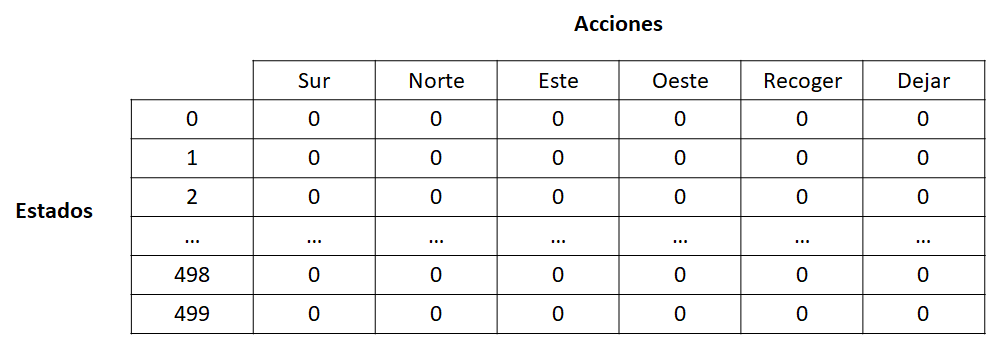

La tabla Q tiene las mismas dimensiones que la tabla de recompensas, pero se inicializa a 0.

In [28]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [29]:
q_table[328]

array([0., 0., 0., 0., 0., 0.])

Definimos la greedy policy, de manera muy parecida a lo que hicimos para el k-bandit:

In [30]:
#trade-off entre explorar y explotar
def greedy(epsilon,q_table,state,env):
    if rd.random() < epsilon:
        action=env.action_space.sample() #explorar
    else:
        action=np.argmax(q_table[state]) #explotar
    return action

Entrenamos nuestro agente con 10000 "episodes". Un episodio empieza con un nuevo pasajero y termina cuando el pasajero llega a su destino.

In [32]:
import random as rd
from IPython.display import clear_output
import numpy as np # Asegúrate de que numpy está importado

# Asumimos que 'env' y 'q_table' ya están definidos y 'greedy' está definida como:
# def greedy(epsilon, q_table, current_s, environment): # Cambié 'state' a 'current_s' para evitar confusión
#     if rd.random() < epsilon:
#         action = environment.action_space.sample() # explorar
#     else:
#         action = np.argmax(q_table[current_s]) # explotar # 'current_s' debe ser un entero
#     return action

# --- INICIO DEL BLOQUE DE ENTRENAMIENTO CORREGIDO ---
# Hyperparameters
alpha = 0.1 # tasa de aprendizaje
gamma = 0.6 # tasa de descuento
epsilon = 0.2 # greedy policy

episodes = 100001 # El notebook original tenía 100001, lo mantengo

# Re-inicializa q_table si es necesario (o asegúrate de que está en el estado deseado)
# q_table = np.zeros([env.observation_space.n, env.action_space.n])

for i in range(episodes):
    # CORRECCIÓN 1: env.reset() devuelve (observation, info)
    # Necesitamos solo la observación como el estado.
    current_state, info = env.reset() # Desempaqueta la tupla
                                      # 'current_state' ahora es el entero de estado

    timesteps_count, penalties_count, episode_reward_sum = 0, 0, 0 # Renombré variables para claridad
    done_flag = False # Renombré 'done' para evitar conflicto con el 'done' de env.step

    while not done_flag:
        # 'current_state' es un entero, por lo que q_table[current_state] es válido
        action = greedy(epsilon, q_table, current_state, env)

        # CORRECCIÓN 2: env.step() devuelve (observation, reward, terminated, truncated, info)
        next_obs, reward_value, terminated, truncated, step_info = env.step(action)
        done_flag = terminated or truncated # 'done' es True si el episodio termina por cualquier razón

        # Acceso a la Q-table (esto debería estar bien ahora)
        old_value = q_table[current_state, action]
        # 'next_obs' es el entero para el siguiente estado
        next_max = np.max(q_table[next_obs])

        # Actualización de la Q-table
        new_value = (1 - alpha) * old_value + alpha * (reward_value + gamma * next_max)
        q_table[current_state, action] = new_value

        if reward_value == -10: # Usar 'reward_value' del step
            penalties_count += 1

        current_state = next_obs # Actualizar el estado para la siguiente iteración
        timesteps_count += 1

    if i % 100 == 0: # Imprimir progreso cada 100 episodios
        clear_output(wait=True)
        print(f"Episode: {i}")
        # Podrías añadir más métricas aquí si quieres, como penalties_count promedio, etc.

print("Training finished.\n")
# --- FIN DEL BLOQUE DE ENTRENAMIENTO CORREGIDO ---

# Para que la función greedy funcione como se espera con estos cambios:
def greedy(epsilon_val, q_values_table, current_s, environment_instance):
    if rd.random() < epsilon_val:
        action_choice = environment_instance.action_space.sample() # explorar
    else:
        action_choice = np.argmax(q_values_table[current_s]) # explotar
    return action_choice

Episode: 100000
Training finished.



In [ ]:
q_table[328]

 Ahora que hemos actualizado la Q-table, podemos ver cómo se comporta nuestro agente según lo que ha aprendido.

 Ya no necesitamos explorar, así que cambiamos la greedy policy: la acción elegida será siempre la que tiene mayor Q-value.


In [34]:
# Asumimos que 'env' y 'q_table' ya están definidos y 'q_table' ha sido entrenada.

total_timesteps_eval, total_penalties_eval = 0, 0 # Renombré para evitar confusión si se ejecuta después del entrenamiento
num_episodes_eval = 100 # Renombré la variable de episodios

for i in range(num_episodes_eval):
    # CORRECCIÓN 1: env.reset() devuelve (observation, info)
    current_state, info = env.reset() # Desempaquetar, 'current_state' es el entero

    timesteps_episode, penalties_episode = 0, 0 # Recompensas no se acumulan, solo se usan para penalizaciones
    done_flag = False

    while not done_flag:
        # 'current_state' es ahora un entero, así que q_table[current_state] es válido
        action = np.argmax(q_table[current_state])

        # CORRECCIÓN 2: env.step() devuelve 5 valores
        next_observation, reward_value, terminated, truncated, step_info = env.step(action)
        done_flag = terminated or truncated # Actualizar la condición de finalización

        if reward_value == -10:
            penalties_episode += 1

        current_state = next_observation # Actualizar el estado para la siguiente iteración
        timesteps_episode += 1

    total_penalties_eval += penalties_episode
    total_timesteps_eval += timesteps_episode

print(f"Results after {num_episodes_eval} episodes:")
print(f"Average timesteps per episode: {total_timesteps_eval / num_episodes_eval}")
print(f"Average penalties per episode: {total_penalties_eval / num_episodes_eval}")

Results after 100 episodes:
Average timesteps per episode: 13.1
Average penalties per episode: 0.0


Si comparamos estos resultados con los de nuestro agente que no aprendía de la tabla Q:


In [36]:
import numpy as np # Aunque no se usa directamente aquí, es buena práctica tenerlo si gym está involucrado

# Asumimos que 'env' ya está definido.

total_timesteps_random, total_penalties_random = 0, 0
num_episodes_random = 100 # Renombré la variable de episodios

for i in range(num_episodes_random):
    # CORRECCIÓN 1: env.reset() devuelve (observation, info)
    current_state, info = env.reset() # Desempaquetar, 'current_state' es el entero
                                      # (Aunque para un agente aleatorio, el estado no se usa para decidir la acción)

    timesteps_episode, penalties_episode = 0, 0
    # 'reward' del step se usará directamente, no necesitamos inicializarla aquí
    done_flag = False

    while not done_flag:
        action = env.action_space.sample() # La acción es aleatoria

        # CORRECCIÓN 2: env.step() devuelve 5 valores
        next_observation, reward_value, terminated, truncated, step_info = env.step(action)
        done_flag = terminated or truncated # Actualizar la condición de finalización

        if reward_value == -10:
            penalties_episode += 1

        # No necesitamos 'current_state = next_observation' para la lógica de acción aleatoria,
        # pero es bueno mantenerlo si alguna vez se quiere registrar el estado.
        current_state = next_observation
        timesteps_episode += 1

    total_penalties_random += penalties_episode
    total_timesteps_random += timesteps_episode

print(f"Results after {num_episodes_random} episodes (Random Agent):")
print(f"Average timesteps per episode: {total_timesteps_random / num_episodes_random}")
print(f"Average penalties per episode: {total_penalties_random / num_episodes_random}")

Results after 100 episodes (Random Agent):
Average timesteps per episode: 2522.87
Average penalties per episode: 814.41


Una encuesta de Nature de 2016 indicó que más del 70% de los investigadores han intentado y no han podido reproducir los experimentos de otro científico, y más de la mitad no han podido reproducir sus propios experimentos.

OpenAI se creó para eliminar este problema de falta de estandarización, junto con el objetivo de crear mejores puntos de referencia al ofrecer un número versátil de entornos con una gran facilidad de configuración.

El objetivo de esta herramienta es aumentar la reproducibilidad en el campo de la IA y proporcionar herramientas con las que todos puedan aprender los conceptos básicos de la IA.

In [41]:
# Opción 1: Obtener solo los IDs (nombres)
registered_envs_ids = list(gym.envs.registry.keys())
print(registered_envs_ids)

# Opción 2: Obtener los objetos EnvSpec (más parecido al .all() original en términos de datos)
# all_env_specs = list(gym.envs.registry.values())
# print(all_env_specs)

['ALE/Adventure-v5', 'ALE/Adventure-ram-v5', 'ALE/AirRaid-v5', 'ALE/AirRaid-ram-v5', 'ALE/Alien-v5', 'ALE/Alien-ram-v5', 'ALE/Amidar-v5', 'ALE/Amidar-ram-v5', 'ALE/Assault-v5', 'ALE/Assault-ram-v5', 'ALE/Asterix-v5', 'ALE/Asterix-ram-v5', 'ALE/Asteroids-v5', 'ALE/Asteroids-ram-v5', 'ALE/Atlantis-v5', 'ALE/Atlantis-ram-v5', 'ALE/Atlantis2-v5', 'ALE/Atlantis2-ram-v5', 'ALE/Backgammon-v5', 'ALE/Backgammon-ram-v5', 'ALE/BankHeist-v5', 'ALE/BankHeist-ram-v5', 'ALE/BasicMath-v5', 'ALE/BasicMath-ram-v5', 'ALE/BattleZone-v5', 'ALE/BattleZone-ram-v5', 'ALE/BeamRider-v5', 'ALE/BeamRider-ram-v5', 'ALE/Berzerk-v5', 'ALE/Berzerk-ram-v5', 'ALE/Blackjack-v5', 'ALE/Blackjack-ram-v5', 'ALE/Bowling-v5', 'ALE/Bowling-ram-v5', 'ALE/Boxing-v5', 'ALE/Boxing-ram-v5', 'ALE/Breakout-v5', 'ALE/Breakout-ram-v5', 'ALE/Carnival-v5', 'ALE/Carnival-ram-v5', 'ALE/Casino-v5', 'ALE/Casino-ram-v5', 'ALE/Centipede-v5', 'ALE/Centipede-ram-v5', 'ALE/ChopperCommand-v5', 'ALE/ChopperCommand-ram-v5', 'ALE/CrazyClimber-v5', 'A